In [37]:
# homework 10 - regression analysis
#
#import necessities
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# read data file
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [39]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]

yen_futures

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0
...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0


In [40]:
# create series using settle price percentage returns

yen_futures['Returns'] = (yen_futures[["Settle"]].pct_change() * 100)
yen_futures['Returns'] = yen_futures['Returns'].replace(-np.inf, np.nan).dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Returns
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


In [41]:
# Create a lagged return using the shift function
yen_futures['Lagged'] = yen_futures.Returns.shift(periods=1)
yen_futures['Lagged'] = yen_futures['Lagged'].replace(-np.inf, np.nan).dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Returns,Lagged
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [42]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2018']
test = yen_futures['2018':]

In [43]:
# Create four dataframes:
# X_train (training set using just the independent variables), 
# X_test (test set of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., 
# "Futures Return"), Y_test (test set of just the "y" variable):

X_train = train['Lagged'].to_frame()
X_train = X_train.replace(-np.inf, np.nan).dropna()
y_train = train['Returns']
y_train = y_train.replace(-np.inf, np.nan).dropna()
X_test = test['Lagged'].to_frame()
X_test = X_test.replace(-np.inf, np.nan).dropna()
y_test = test['Returns']
y_test = y_test.replace(-np.inf, np.nan).dropna()

In [44]:
X_train
y_train = y_train.loc['1990-01-04':]


In [45]:
# create a linear regression model and fit it to the training data
# independent variable must be reshaped
# x = df.'XX'.values.reshape(-1, 1)

# y_test = y_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# make a prediction of 'y' values using just the test dataset
# should this be predict(y_test) instead?  causes an error for reshaping - CHECK VIDEO #8, 10.3

predictions = model.predict(X_test)

In [47]:
# Assemble actual y data (Y_test) with predicted y data (from just above)
# into two columns in a dataframe:
y_model_results = y_test.to_frame()
y_model_results['Predictions'] = predictions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8B6BB96C8>,
      dtype=object)

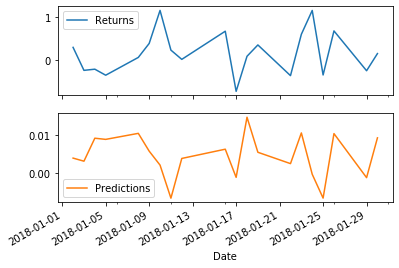

In [48]:
# Plot the first 20 predictions vs the true values
y_model_results[:20].plot(subplots=True)

In [49]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
out_sample_mse = mean_squared_error(
    y_model_results['Returns'],
    y_model_results['Predictions']
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_sample_rmse = np.sqrt(out_sample_mse)
print('Out of Sample Root Mean Squared Error:  ', out_sample_rmse)

Out of Sample Root Mean Squared Error:   0.413638294591423


In [50]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:
in_predictions = model.predict(X_train)
in_sample_results['In-Sample Predictions'] = in_predictions
in_sample_results.head()
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results['Returns'],
    in_sample_results['In-Sample Predictions']
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print('In Sample Root Mean Squared Error:  ', in_sample_rmse)

In Sample Root Mean Squared Error:   0.6982251907797692
